In [2]:
!pip install keras_bert
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import time
import keras
from keras_bert import get_base_dict, get_model, compile_model, gen_batch_inputs

  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp37-none-any.whl size=34144 sha256=f68fa8dc3ad3e100e2fa290bdbdd3cd04b9383970489184dd546f6e3b26bb74d
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for keras-transformer: filename=keras_transformer-0.38.0-cp37-none-any.whl size=12942 sha256=345e2a2832a497df33a287973f4d271653cd7398a8e29524b6be813a406c0c32
  Stored in directory: /root/.cache/pip/wheels/e5/fb/3a/37b2b9326c799aa010ae46a04ddb04f320d8c77c0b7e837f4e
  Created wheel for keras-pos-embd: filename=keras_pos_embd-0.11.0-cp37-none-any.whl size=7554 sha256=de342df5d5e2c6c71b36e7473a8820ad9f2ca791791663d50329e95b9d46bb08
  Stored in directory: /root/.cache/pip/wheels/5b/a1/a0/ce6b1d49ba1a9a76f592e70cf297b05c96bc9f418146761032
  Created wheel for keras-multi-head: filename=keras_multi_head-0.27.0-cp37-none-any.whl size=15611 sha256=efeda284d33338b5898a2ae11d476fc6b69a5eb95938349b12a9b26f8b6b5626
  Stor

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
!cd gdrive/My' 'Drive/Colab' 'Notebooks
!ls gdrive/My' 'Drive/Colab' 'Notebooks
import os
os.chdir("gdrive/My Drive/Colab Notebooks")

 bertmodel
 bert_trained.png
 bot_model3.py
 bot_model_fin2.py
 bot_model_final.py
 bot_model_fin.py
 bot_models.py
 bot_train_savefile.py
 conv.txt
'Copy of pre2_savefile.ipynb'
'Copy of pre.ipynb'
 data_2.json
 datapre.py
 embeddings_colab.kv
 embeddings.kv
 fc_net_git.py
 fc_net.py
 layers
 model
 modelvc_colab.model
 modelvc_colab.model.trainables.syn1neg.npy
 modelvc_colab.model.wv.vectors.npy
 modelvc.model
 modelvc.model.syn1neg.npy
 modelvc.model.wv.vectors.npy
 movie_conversations.txt
 movie_lines.txt
 pre2_run.ipynb
 pre2_savefile.ipynb
 pre.ipynb
 __pycache__
 questions-word2s.txt
 questions-words.txt
 td.txt
 test.txt
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 w2v.txt


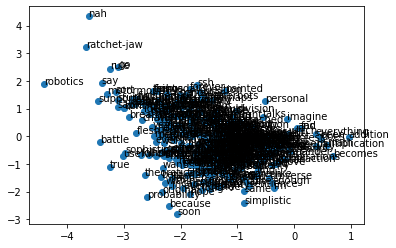

In [ ]:
settings = {
    'window_size': 2,
    'n': 120,
    'epochs': 100,
    'learning_rate':0.1,
    'randepochs':0
}
dataname = "data_2.json"
max_seq_len = 10
limit = 10000000
from numpy import linalg as LA
import json
with open(dataname) as json_file:
        data = json.load(json_file)
words = list(data.keys())
v_count = len(words)
n = settings['n']
input = np.zeros((v_count, n))

dim = n
input = np.zeros((v_count, n))
for i in range(v_count):
        word = words[i]
        input[i, :] = data[word]
input = input.T
Cov = 1 / dim * input.dot(input.T)
w, v2 = LA.eig(Cov)
wid = np.argsort(w)
wid_1 = wid[dim - 1]
wid_2 = wid[dim - 2]
v = np.zeros((dim, 2))
v[:, 0] = v2[:, wid_1]
v[:, 1] = v2[:, wid_2]
output = input
output = v.T.dot(input)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(output[0,:],output[1,:])
    #maxx = np.max(output[0,:])
    #maxy = np.max(output[1, :])
    #minx = np.min(output[0, :])
    #miny = np.min(output[1, :])
for i in range(v_count):
      ax.annotate(words[i],(output[0,i],output[1,i]))
ax.axis('auto')
ax.set_autoscale_on(True)
    #ax.plot([minx,maxx],[miny,maxy])
plt.show()

In [ ]:
import math
for i in range(20,30):
        word = words[i]
        print([i,word,v[i,:]])
def vector_sqrtlen(vector):
    len = 0
    for item in vector:
        len += item * item
    len = math.sqrt(len)
    return len        
def vector_cosine(v1, v2):
    if len(v1) != len(v2):
        sys.exit(1)
    sqrtlen1 = vector_sqrtlen(v1)
    sqrtlen2 = vector_sqrtlen(v2)
    value = 0
    for item1, item2 in zip(v1, v2):
        value += item1 * item2
    return value / (sqrtlen1*sqrtlen2)
print(vector_cosine(v[20,:],v[23,:]))
print(vector_cosine(v[20,:],v[22,:]))

[20, 'making', array([ 0.09245342, -0.21518246])]
[21, 'sense', array([-0.02052905,  0.09833149])]
[22, 'do', array([-0.06565472,  0.05179302])]
[23, 'make', array([-0.00631693, -0.02536876])]
[24, 'any', array([-0.10355671, -0.18746536])]
[25, 'can', array([-0.11109442,  0.06692732])]
[26, 'clone', array([-0.09752639, -0.01830039])]
[27, 'move', array([-0.05587241,  0.04840328])]
[28, 'bend', array([ 0.01197213, -0.07728672])]
[29, 'over', array([ 0.12865604, -0.02151301])]
0.7961775460520083
-0.8789809488108233


In [8]:
def movieinput():
    import pandas as pd
    import numpy as np
    import tensorflow as tf
    import re
    import time
    lines = open('movie_lines.txt', encoding='utf-8', errors='ignore').read().split('\n')
    conv_lines = open('movie_conversations.txt', encoding='utf-8', errors='ignore').read().split('\n')
    id2line = {}
    for line in lines:
        _line = line.split(' +++$+++ ')
        if len(_line) == 5:
            id2line[_line[0]] = _line[4]
    convs = []
    for line in conv_lines[:-1]:
        _line = line.split(' +++$+++ ')[-1][1:-1].replace("'", "").replace(" ", "")
        convs.append(_line.split(','))
    questions = []
    answers = []
    final = []
    for conv in convs:
        for i in range(len(conv) - 1):
            questions.append(id2line[conv[i]])
            answers.append(id2line[conv[i + 1]])
            final.append([id2line[conv[i]].split(),id2line[conv[i+1]].split()])
    corpust = questions + answers
    corpus = [re.sub(r'[^A-Za-z0-9 -]+', '', word.lower()) + ' <EOS>' for word in corpust]
    print(questions[0:10])
    print('\n')
    print(answers[0:10])
    print('\n')
    print(final[0:10])
    return [corpus,final]

In [9]:
[corpus,sentence_pairs] = movieinput()

['Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.', "Well, I thought we'd start with pronunciation, if that's okay with you.", 'Not the hacking and gagging and spitting part.  Please.', "You're asking me out.  That's so cute. What's your name again?", "No, no, it's my fault -- we didn't have a proper introduction ---", 'Cameron.', "The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.", 'Why?', 'Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.', 'Gosh, if only we could find Kat a boyfriend...']


["Well, I thought we'd start with pronunciation, if that's okay with you.", 'Not the hacking and gagging and spitting part.  Please.', "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?", 'Forget it.', 'Cameron.', "The thing is, Ca

In [ ]:

model = get_model(
    token_num=len(token_dict),
    head_num=5,
    transformer_num=12,
    embed_dim=200,
    feed_forward_dim=100,
    seq_len=10,
    pos_num=20,
    dropout_rate=0.05,
)
compile_model(model)
model.summary()

def _generator():
    while True:
        yield gen_batch_inputs(
            sentence_pairs,
            token_dict,
            token_list,
            seq_len=10,
            mask_rate=0.3,
            swap_sentence_rate=1.0,
        )

model.fit_generator(
    generator=_generator(),
    steps_per_epoch=10,
    epochs=100,
    validation_data=_generator(),
    validation_steps=10,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    ],
)
model.save('bertmodel')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 10)]         0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 10)]         0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 10, 200), (6 133400      Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 10, 200)      400         Input-Segment[0][0]              
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 152s 942ms/step - loss: 2.2759 - MLM_loss: 1.5959 - NSP_loss: 0.6800 - val_loss: 1.8132 - val_MLM_loss: 1.5977 - val_NSP_loss: 0.2155
Epoch 2/100
100/100 [==============================] - 87s 873ms/step - loss: 1.7811 - MLM_loss: 1.6021 - NSP_loss: 0.1790 - val_loss: 1.6797 - val_MLM_loss: 1.6081 - val_NSP_loss: 0.0716
Epoch 3/100
100/100 [==============================] - 87s 868ms/step - loss: 1.6544 - MLM_loss: 1.5890 - NSP_loss: 0.0654 - val_loss: 1.6524 - val_MLM_loss: 1.5935 - val_NSP_loss: 0.0589
Epoch 4/100
100/100 [==============================] - 88s 881ms/step - loss: 1.6410 - MLM_loss: 1.5774 - NSP_loss: 0.0636 - val_loss: 1.6193 - val_MLM_loss: 1.5638 - val_NSP_loss: 0.0555
Epoch 5/100
100/100 [==============================] - 89s 893ms/step - loss: 1.6198 - MLM_loss: 1.5616 - NSP_loss: 0.0582 - val_loss: 1.6059 - val_MLM_loss: 1.5495 - val_NSP_loss: 0.0564
Epoch 6/100
100/100 [==============================] - 88s 

In [ ]:
model.save('/content/gdrive/MyDrive/model')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/model/assets


In [10]:
!ls /content

gdrive	sample_data


In [11]:
sentence_pairs = sentence_pairs[1:100]
token_dict = get_base_dict()
for pairs in sentence_pairs:
    for token in pairs[0] + pairs[1]:
        if token not in token_dict:
            token_dict[token] = len(token_dict)
token_list = list(token_dict.keys())
inputs, output_layer = get_model(
    token_num=len(token_dict),
    head_num=5,
    transformer_num=12,
    embed_dim=25,
    feed_forward_dim=100,
    seq_len=20,
    pos_num=20,
    dropout_rate=0.05,
    training=False,      
    trainable=False,    
    output_layer_num=4,  
)

In [12]:
from keras_bert import Tokenizer

tokenizer = Tokenizer(token_dict)
text = 'Can we make this? We can not'
tokens = tokenizer.tokenize(text)
indices, segments = tokenizer.encode(first=text, max_len=20)
print(indices[:10])
print(segments[:10])

[2, 116, 28, 630, 294, 1, 28, 116, 228, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [13]:
model2 = keras.models.Model(inputs=inputs, outputs=output_layer)
model2.compile(optimizer='adam', loss='mse', metrics={})
model2.summary(line_length=120)

Model: "model_1"
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
Input-Token (InputLayer)               [(None, 20)]               0                                                     
________________________________________________________________________________________________________________________
Input-Segment (InputLayer)             [(None, 20)]               0                                                     
________________________________________________________________________________________________________________________
Embedding-Token (TokenEmbedding)       [(None, 20, 25), (667, 25) 16675         Input-Token[0][0]                       
________________________________________________________________________________________________________________________
Embedding-Segme

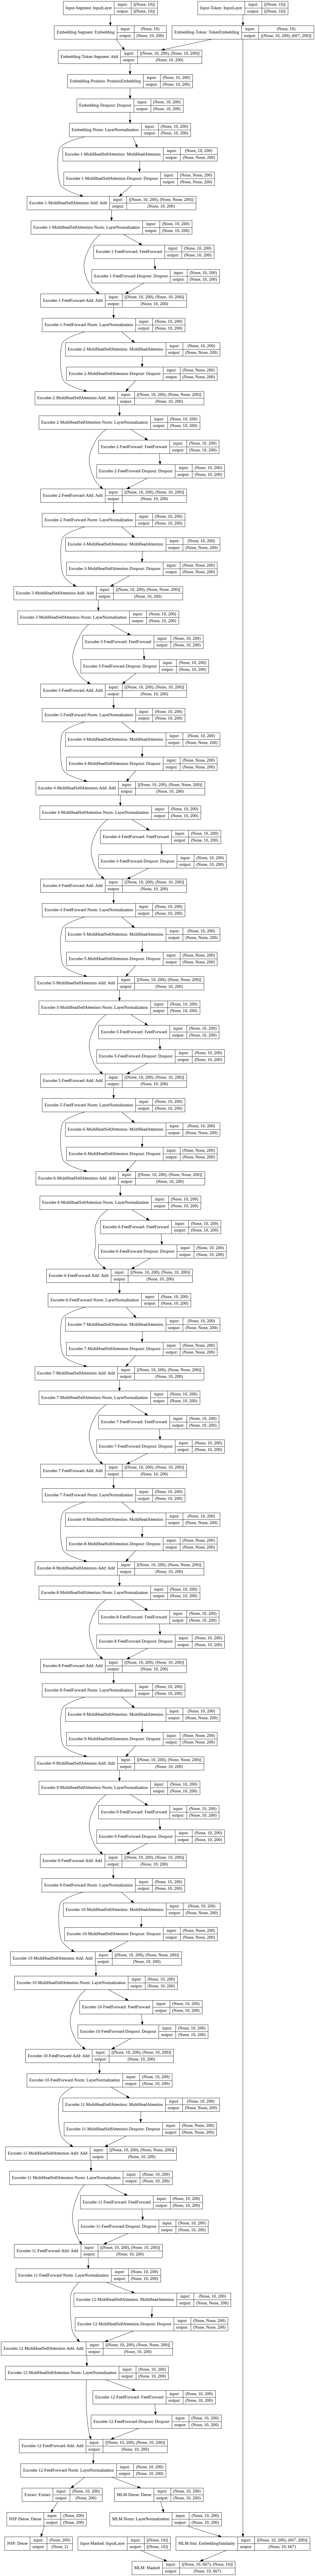

In [ ]:

keras.utils.plot_model(model, show_shapes=True,  to_file='bert_trained.png')

In [14]:

import numpy as np

predicts = model2.predict([np.array([indices]), np.array([segments])])[0]
for i, token in enumerate(tokens):
    print(token, predicts[i].tolist()[:5])

[CLS] [0.19930541515350342, -2.045710802078247, -0.19576787948608398, -0.11111051589250565, -0.7631808519363403]
can [0.1740771234035492, -2.051166296005249, -0.1464344561100006, -0.10913122445344925, -0.7546226382255554]
we [0.2772517800331116, -2.0191822052001953, -0.1684354543685913, -0.19797354936599731, -0.7251377105712891]
make [0.209358349442482, -2.0317890644073486, -0.1701669991016388, -0.10881322622299194, -0.7527040243148804]
this [0.18487843871116638, -2.063070774078369, -0.17904256284236908, -0.09868790209293365, -0.7503204941749573]
? [0.1860228329896927, -2.045335531234741, -0.1840859353542328, -0.08032078295946121, -0.7810736894607544]
we [0.21513618528842926, -2.0326738357543945, -0.18496881425380707, -0.1392267644405365, -0.7184607982635498]
can [0.17795425653457642, -2.024407148361206, -0.18103261291980743, -0.06884712725877762, -0.7843725085258484]
not [0.1862761378288269, -2.0616519451141357, -0.1379789263010025, -0.12126358598470688, -0.7159537076950073]
[SEP] [0.

In [15]:
print(tokens[1],predicts[1])
print(tokens[7],predicts[7])

can [ 0.17407712 -2.0511663  -0.14643446 -0.10913122 -0.75462264 -1.213733
  2.0055566   0.65357864  0.00704973  1.9237031  -0.47936788 -1.7090243
  0.13983132 -0.2591036   0.19905558 -0.17943993 -0.9249035   1.7441622
  1.4918889   0.24875769  0.19061804  0.39165908 -0.14195012 -0.83607966
 -0.36498132 -0.39758343 -1.1351824   0.20651996  0.34383884 -0.2395419
 -0.77839893  1.901482    1.068793    0.88500327  1.8342144  -0.30983573
 -2.0457146   0.15719558 -0.27130476  0.0572473  -0.1159703  -0.5291573
 -0.26300976  0.8616467   1.3553041  -1.6807563   1.0495576   0.17390569
 -1.4367244  -0.69152826  0.6371097  -0.804708   -0.55224705 -0.17227253
  0.20780347 -0.9676555   1.2330679   1.6208683   0.09708575  1.3099055
 -1.5009285  -1.5636046  -0.17876908  0.7434933  -0.03166784  0.97302073
 -0.68137574 -1.094196    1.4223496   1.0809349  -0.8625295   1.4325118
  0.02241275 -1.3720585  -0.9985504  -0.05994548  0.12509604 -0.1639078
 -1.4432242   0.66544294 -0.2985079   1.1476895   0.5108

In [1]:
p1 = 17882
p2 = 13406

print('padding percentage: '+str(p1/(p1+p2)))
print('vector percentage: '+str(p2/(p1+p2)))

padding percentage: 0.5715290207108157
vector percentage: 0.4284709792891844
